#### Import liabraries and load datasets

In [ ]:
# import data science basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load data
df = pd.read_csv('/content/data.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#### Exploratory Data Analysis

In [ ]:
# data shape
df.shape

(918, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
# show unique values
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [ ]:
# data basic statistics
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
# missing values in decerding order
df.isnull().sum().sort_values(ascending=False)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
# numerical and categorical features
Categorical = df.select_dtypes(include=['object'])
Numerical = df.select_dtypes(include=['int64', 'float64'])
print('Categorical features:\n', Categorical)
print('Numerical features:\n', Numerical)

Categorical features:
     Sex ChestPainType RestingECG ExerciseAngina ST_Slope
0     M           ATA     Normal              N       Up
1     F           NAP     Normal              N     Flat
2     M           ATA         ST              N       Up
3     F           ASY     Normal              Y     Flat
4     M           NAP     Normal              N       Up
..   ..           ...        ...            ...      ...
913   M            TA     Normal              N     Flat
914   M           ASY     Normal              N     Flat
915   M           ASY     Normal              Y     Flat
916   F           ATA        LVH              N     Flat
917   M           NAP     Normal              N       Up

[918 rows x 5 columns]
Numerical features:
      Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease
0     40        140          289          0    172      0.0             0
1     49        160          180          0    156      1.0             1
2     37        130       

In [ ]:
# count target variable
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [ ]:
dummies = pd.get_dummies(df.Sex)
dummies
df=df.drop(['Sex'],axis=1)
df=pd.concat([df,dummies],axis='columns')
df

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M
0,40,ATA,140,289,0,Normal,172,N,0.0,Up,0,0,1
1,49,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1,0
2,37,ATA,130,283,0,ST,98,N,0.0,Up,0,0,1
3,48,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,1,0
4,54,NAP,150,195,0,Normal,122,N,0.0,Up,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,TA,110,264,0,Normal,132,N,1.2,Flat,1,0,1
914,68,ASY,144,193,1,Normal,141,N,3.4,Flat,1,0,1
915,57,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,0,1
916,57,ATA,130,236,0,LVH,174,N,0.0,Flat,1,1,0


In [ ]:
dummies = pd.get_dummies(df.ChestPainType)
dummies
df=df.drop(['ChestPainType'],axis=1)
df=pd.concat([df,dummies],axis='columns')
df

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M,ASY,ATA,NAP,TA
0,40,140,289,0,Normal,172,N,0.0,Up,0,0,1,0,1,0,0
1,49,160,180,0,Normal,156,N,1.0,Flat,1,1,0,0,0,1,0
2,37,130,283,0,ST,98,N,0.0,Up,0,0,1,0,1,0,0
3,48,138,214,0,Normal,108,Y,1.5,Flat,1,1,0,1,0,0,0
4,54,150,195,0,Normal,122,N,0.0,Up,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,Normal,132,N,1.2,Flat,1,0,1,0,0,0,1
914,68,144,193,1,Normal,141,N,3.4,Flat,1,0,1,1,0,0,0
915,57,130,131,0,Normal,115,Y,1.2,Flat,1,0,1,1,0,0,0
916,57,130,236,0,LVH,174,N,0.0,Flat,1,1,0,0,1,0,0


In [ ]:
dummies = pd.get_dummies(df.RestingECG)
dummies
df=df.drop(['RestingECG'],axis=1)
df=pd.concat([df,dummies],axis='columns')
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M,ASY,ATA,NAP,TA,LVH,Normal,ST
0,40,140,289,0,172,N,0.0,Up,0,0,1,0,1,0,0,0,1,0
1,49,160,180,0,156,N,1.0,Flat,1,1,0,0,0,1,0,0,1,0
2,37,130,283,0,98,N,0.0,Up,0,0,1,0,1,0,0,0,0,1
3,48,138,214,0,108,Y,1.5,Flat,1,1,0,1,0,0,0,0,1,0
4,54,150,195,0,122,N,0.0,Up,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,N,1.2,Flat,1,0,1,0,0,0,1,0,1,0
914,68,144,193,1,141,N,3.4,Flat,1,0,1,1,0,0,0,0,1,0
915,57,130,131,0,115,Y,1.2,Flat,1,0,1,1,0,0,0,0,1,0
916,57,130,236,0,174,N,0.0,Flat,1,1,0,0,1,0,0,1,0,0


In [ ]:
dummies = pd.get_dummies(df.ExerciseAngina)
dummies
df=df.drop(['ExerciseAngina'],axis=1)
df=pd.concat([df,dummies],axis='columns')
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,HeartDisease,F,M,ASY,ATA,NAP,TA,LVH,Normal,ST,N,Y
0,40,140,289,0,172,0.0,Up,0,0,1,0,1,0,0,0,1,0,1,0
1,49,160,180,0,156,1.0,Flat,1,1,0,0,0,1,0,0,1,0,1,0
2,37,130,283,0,98,0.0,Up,0,0,1,0,1,0,0,0,0,1,1,0
3,48,138,214,0,108,1.5,Flat,1,1,0,1,0,0,0,0,1,0,0,1
4,54,150,195,0,122,0.0,Up,0,0,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,Flat,1,0,1,0,0,0,1,0,1,0,1,0
914,68,144,193,1,141,3.4,Flat,1,0,1,1,0,0,0,0,1,0,1,0
915,57,130,131,0,115,1.2,Flat,1,0,1,1,0,0,0,0,1,0,0,1
916,57,130,236,0,174,0.0,Flat,1,1,0,0,1,0,0,1,0,0,1,0


In [ ]:
dummies = pd.get_dummies(df.ST_Slope)
dummies
df=df.drop(['ST_Slope'],axis=1)
df=pd.concat([df,dummies],axis='columns')
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,F,M,ASY,...,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


#### Visualization

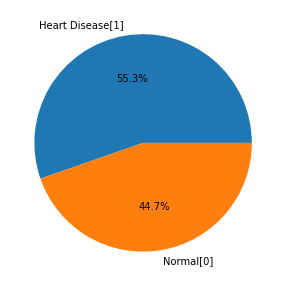

In [ ]:
# Normal and Heart Disease with target column
plt.figure(figsize=(10,5))
plt.pie(df['HeartDisease'].value_counts(), labels=['Heart Disease[1]', 'Normal[0]'], autopct='%1.1f%%')
plt.show()

In [ ]:
X = df.drop(columns='HeartDisease', axis=1) # X is independent variables
Y = df['HeartDisease'] # Y is dependent variables

In [ ]:
print(X)

     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  F  M  ASY  ATA  \
0     40        140          289          0    172      0.0  0  1    0    1   
1     49        160          180          0    156      1.0  1  0    0    0   
2     37        130          283          0     98      0.0  0  1    0    1   
3     48        138          214          0    108      1.5  1  0    1    0   
4     54        150          195          0    122      0.0  0  1    0    0   
..   ...        ...          ...        ...    ...      ... .. ..  ...  ...   
913   45        110          264          0    132      1.2  0  1    0    0   
914   68        144          193          1    141      3.4  0  1    1    0   
915   57        130          131          0    115      1.2  0  1    1    0   
916   57        130          236          0    174      0.0  1  0    0    1   
917   38        138          175          0    173      0.0  0  1    0    0   

     NAP  TA  LVH  Normal  ST  N  Y  Down  Flat  Up

In [ ]:
print(Y)

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")
classifier.fit(X_train, Y_train)

y_predict = classifier.predict(X_test)

Resultdf=X_test
Resultdf['HeartDisease']=y_predict
print(Resultdf.head(10).to_string())
print("accuracy:")
print(accuracy_score(Y_test,y_predict))

     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  F  M  ASY  ATA  NAP  TA  LVH  Normal  ST  N  Y  Down  Flat  Up  HeartDisease
821   60        102          318          0    160      0.0  1  0    0    0    1   0    0       1   0  1  0     0     0   1             0
748   64        120          246          0     96      2.2  0  1    1    0    0   0    1       0   0  0  1     1     0   0             1
797   41        110          172          0    158      0.0  0  1    1    0    0   0    1       0   0  1  0     0     0   1             0
396   62        140            0          1    143      0.0  1  0    0    0    0   1    0       1   0  1  0     0     1   0             1
486   55        110          214          1    180      0.4  0  1    0    1    0   0    0       0   1  1  0     0     0   1             0
564   57        144          270          1    160      2.0  0  1    1    0    0   0    0       0   1  0  1     0     1   0             1
324   46        100            0  